<a href="https://colab.research.google.com/github/IshGish/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/DS9_W2D3_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:


### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
    positive_verification_rate = 1.0
    
    ans = (                     (positive_verification_rate * prob_drunk_prior)
                                                            /
           ((positive_verification_rate * prob_drunk_prior) + (false_positive_rate * (1 - prob_drunk_prior)))
          )

    return ans


# positive_verification_rate = 1.0
# prob_drunk_prior           = 0.001
# false_positive_rate        = 0.08

#                      (positive_verification_rate * prob_drunk_prior)
#                                                  /
# ((positive_verification_rate * prob_drunk_prior) + (false_positive_rate * (1 - prob_drunk_prior)))

#           (1 * 0.001)
#              /
# ((1 * 0.001) + (0.08 * 0.999))

# Thankfully this one didn't take me the entire day to try and figure out,
# but those equasions are still impossible for me to understand.

I'm having a hard time getting this written in a way that makes each part of the equation make sense for future reference.

Of 1000 people, 1 is a drunk driver, but 8 additional people are falsly identified as drunk drivers.

Of the 9 people who are listed as drunk drivers, only one of them actually is. The chance of being that one is about 1/8, but more likely you're one of the 7 others who were falsely identified.


In [0]:
# What is the probability that a person is drunk after one positive breathalyzer test?

drunk_drivers = 0.001
false_pos  = 0.08

print(prob_drunk_given_positive(drunk_drivers, false_pos))

0.012357884330202669


In [0]:
# What is the probability that a person is drunk after two positive breathalyzer tests?

drunk_drivers = 0.012357884330202669
false_pos  = 0.08

print(prob_drunk_given_positive(drunk_drivers, false_pos))

0.13525210993291495


In [0]:
# How many positive breathalyzer tests are needed in order to have a probability
# that's greater than 95% that a person is drunk beyond the legal limit?

# Run 3:

drunk_drivers = 0.13525210993291495
false_pos  = 0.08

print(prob_drunk_given_positive(drunk_drivers, false_pos))

# Run: 4
drunk_drivers = 0.6615996951348605
false_pos  = 0.08

print(prob_drunk_given_positive(drunk_drivers, false_pos))

# Only 4 runs

0.6615996951348605
0.9606895076105054


### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

In [0]:
from google.colab import files
uploaded = files.upload()

Saving CDC Mortality Dataframe California 1999 - 2016.csv to CDC Mortality Dataframe California 1999 - 2016.csv


In [0]:
california_df = pd.read_csv('CDC Mortality Dataframe California 1999 - 2016.csv').drop(['Unnamed: 0'], axis=1).set_index(['Year'])

In [183]:
california_df.columns

Index(['Year Code', 'State', 'State Code', 'County', 'County Code',
       'Age Group', 'Age Group Code', 'Cause of death', 'Cause of death Code',
       'Deaths', 'Population', 'Crude Rate', 'Crude Rate Standard Error'],
      dtype='object')

In [168]:
california_df.dtypes

Year Code                     int64
State                        object
State Code                    int64
County                       object
County Code                   int64
Age Group                    object
Age Group Code               object
Cause of death               object
Cause of death Code          object
Deaths                        int64
Population                   object
Crude Rate                   object
Crude Rate Standard Error    object
dtype: object

In [184]:
california_df.isnull().sum()

Year Code                    0
State                        0
State Code                   0
County                       0
County Code                  0
Age Group                    0
Age Group Code               0
Cause of death               0
Cause of death Code          0
Deaths                       0
Population                   0
Crude Rate                   0
Crude Rate Standard Error    0
dtype: int64

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#### Bayesian

In [194]:
stats.bayes_mvs(california_df['Deaths'], alpha=0.95)

(Mean(statistic=42.76685196500693, minmax=(42.01414766446602, 43.519556265547834)),
 Variance(statistic=9896.204483407213, minmax=(9790.309905057278, 10002.099061757148)),
 Std_dev(statistic=99.47966869369446, minmax=(98.94742637855371, 100.01191100883521)))

In [208]:
bayesian_ci = []
bayesian_ci.append(stats.bayes_mvs(california_df['Deaths'], alpha=0.95)[0][0])
bayesian_ci.append(stats.bayes_mvs(california_df['Deaths'], alpha=0.95)[0][1][0])
bayesian_ci.append(stats.bayes_mvs(california_df['Deaths'], alpha=0.95)[0][1][1])
bayesian_ci

[42.76685196500693, 42.01414766446602, 43.519556265547834]

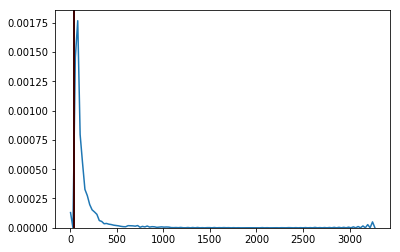

In [209]:
array = california_df['Deaths'].to_numpy()
CI = bayesian_ci

sns.kdeplot(array)
plt.axvline(x = CI[1], color = 'red')
plt.axvline(x = CI[2], color = 'red')
plt.axvline(x = CI[0], color = 'k')

plt.show()

#### Frequentist

In [0]:
def confidence_interval(data, confidence=.95):
    mean = sum(data)/len(data)
    array = np.array(data)
    stderr = stats.sem(array)
    interval = stderr * stats.t.ppf((1 + confidence) / 2.0, len(array)-1)
    
    return (mean , mean-interval, mean+interval)

In [181]:
frequentist_ci = confidence_interval(california_df['Deaths'])
frequentist_ci

(42.76685196500693, 42.014128477300815, 43.51957545271304)

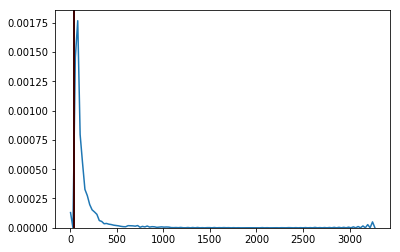

In [201]:
array = california_df['Deaths'].to_numpy()
CI = frequentist_ci

sns.kdeplot(array)
plt.axvline(x = CI[1], color = 'red')
plt.axvline(x = CI[2], color = 'red')
plt.axvline(x = CI[0], color = 'k')

plt.show()

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).

In [0]:
# Frequentist statistics cares more about the size of the sample and how that relates to the larger population to make inferences.
# Bayesian statistics cares more about what the answer was before and how that data shapes the inference with each run.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!